### Objective 1 
 "Identify high-performing product categories and their target web audiences through sentiment and engagement analytics."
### Objective 2
 "Analyze negative online content to identify recurring dissatisfaction patterns and product-related issues."
### Objective 3
 "Evaluate how sentiment and content volume vary across divisions to optimize web marketing and inventory focus."

In [1]:
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  kuspranathi


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews


100%|██████████████████████████████████████████████████████████████████████████████| 2.79M/2.79M [00:03<00:00, 831kB/s]

In [2]:
pip install pypandoc

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("C:\\Users\\DELL\\womens-ecommerce-clothing-reviews\\Womens Clothing E-Commerce Reviews.csv")

In [4]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import nltk
import string
from nltk.corpus import stopwords

In [6]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df['Review Text'] = df['Review Text'].astype(str)

In [8]:
# Drop rows with missing review text
df.dropna(subset=['Review Text'], inplace=True)

In [9]:
# Preload stopwords once and convert to a set for faster lookup
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def preprocess_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in punctuations])
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

# Apply optimized preprocessing
df['Cleaned_Review'] = df['Review Text'].astype(str).apply(preprocess_text)

## Overall Word Cloud of Online Review Content

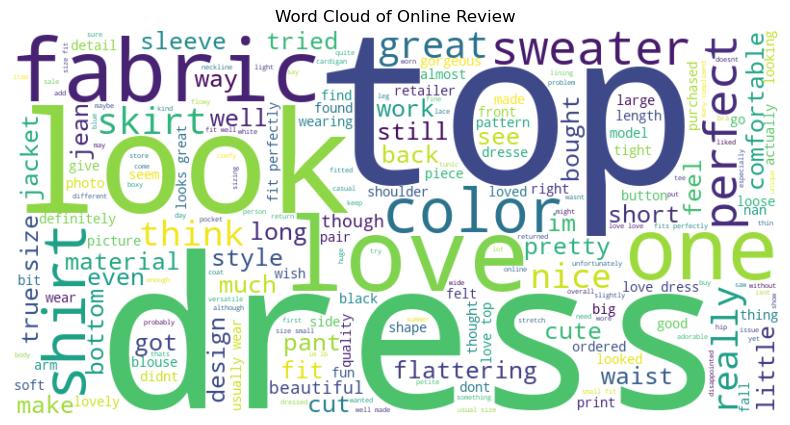

In [10]:
# --- Word Cloud ---
all_words = ' '.join(df['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Online Review")
plt.show()

In [11]:
# --- Web Content Analysis ---
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

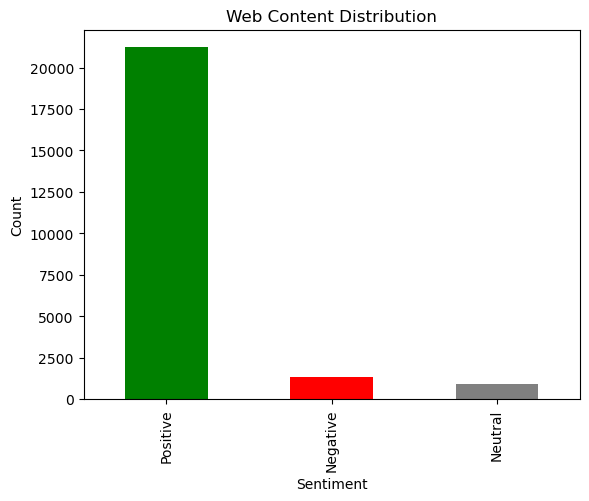

In [12]:
# Visualize Web Content Distribution
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Web Content Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [13]:
# Filter negative reviews
negative_reviews = df[df['Sentiment'] == 'Negative']['Cleaned_Review']

# Join all negative words
negative_words = ' '.join(negative_reviews)


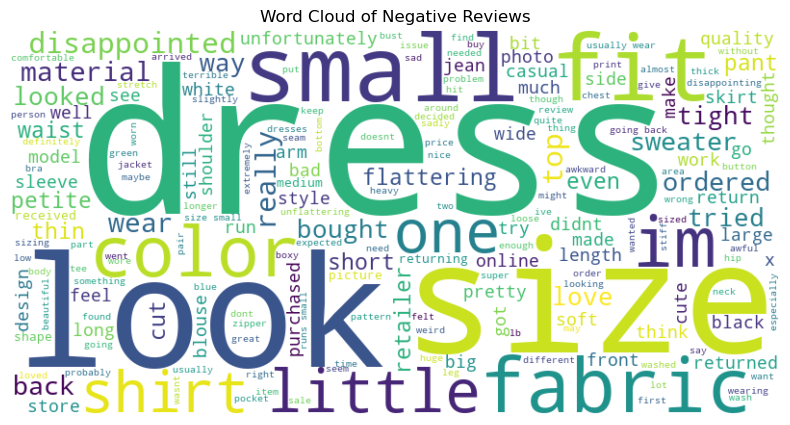

In [14]:
# Create Word Cloud
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

# Plot it
plt.figure(figsize=(10,5))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews")
plt.show()

In [15]:
all_negative_words = ' '.join(negative_reviews).split()
# Count word frequency
word_counts = Counter(all_negative_words)
top_10 = word_counts.most_common(10)

# Convert to DataFrame for plotting
top_words_df = pd.DataFrame(top_10, columns=['Word', 'Frequency'])


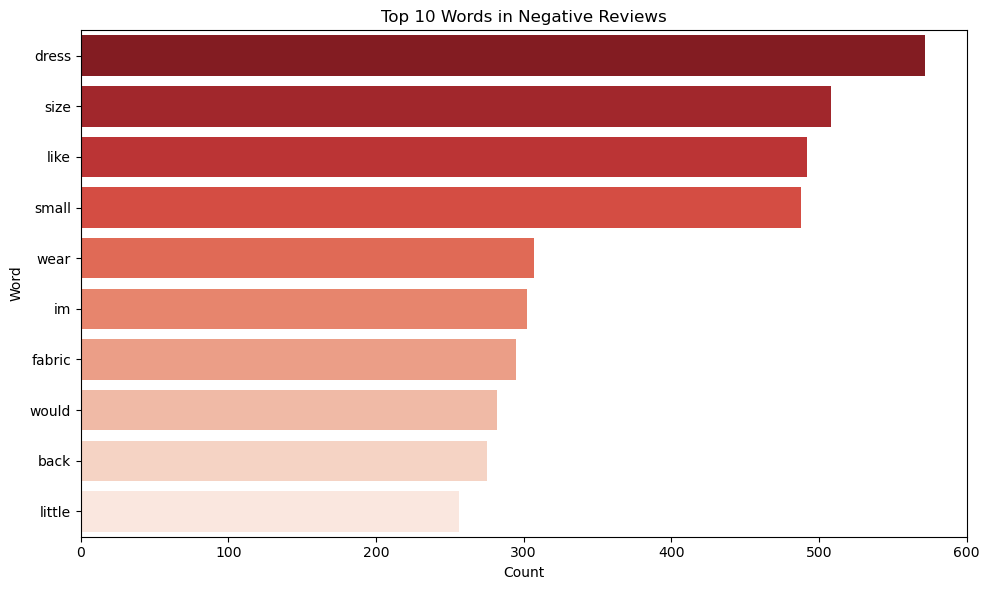

In [16]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='Reds_r')
plt.title("Top 10 Words in Negative Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

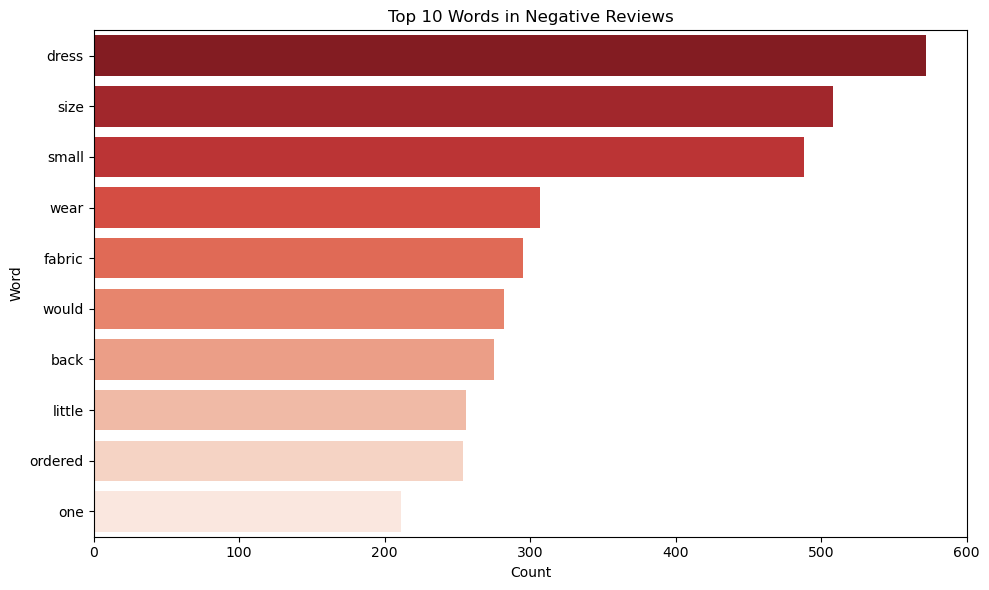

In [17]:
# Define custom stopwords
custom_stopwords = set(['like', 'im'])

# Recalculate word frequencies excluding custom stopwords
filtered_words = [word for word in all_negative_words if word not in custom_stopwords]

# Count frequencies
filtered_word_counts = Counter(filtered_words)
top_10_filtered = filtered_word_counts.most_common(10)

# Convert to DataFrame
filtered_df = pd.DataFrame(top_10_filtered, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Word', data=filtered_df, palette='Reds_r')
plt.title("Top 10 Words in Negative Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


In [18]:
!pip install squarify

In [19]:
import matplotlib.colors as mcolors

df_positive = df[df['Sentiment'] == 'Positive']
df_negative = df[df['Sentiment'] == 'Negative']

def plot_sentiment_treemap(df_sentiment, sentiment_label, cmap):
    # Group data
    sentiment_df = df_sentiment.groupby('Class Name').agg({
        'Review Text': 'count',
        'Rating': 'mean'
    }).reset_index().rename(columns={'Review Text': 'Review_Count', 'Rating': 'Avg_Rating'})

    if sentiment_df.empty:
        print(f"No {sentiment_label.lower()} reviews found.")
        return

    # Normalize for color
    norm = plt.Normalize(sentiment_df['Avg_Rating'].min(), sentiment_df['Avg_Rating'].max())
    colors = [mcolors.to_hex(cmap(norm(x))) for x in sentiment_df['Avg_Rating']]

    # Labels
    labels = [f"{name}\n{count} reviews\nRating: {rating:.1f}"
              for name, count, rating in zip(sentiment_df['Class Name'], sentiment_df['Review_Count'], sentiment_df['Avg_Rating'])]

    # Plot
    plt.figure(figsize=(14, 8))
    squarify.plot(sizes=sentiment_df['Review_Count'], label=labels, color=colors, alpha=0.85)
    plt.axis('off')
    plt.title(f"Treemap of {sentiment_label} Reviews by Product Class")
    plt.show()


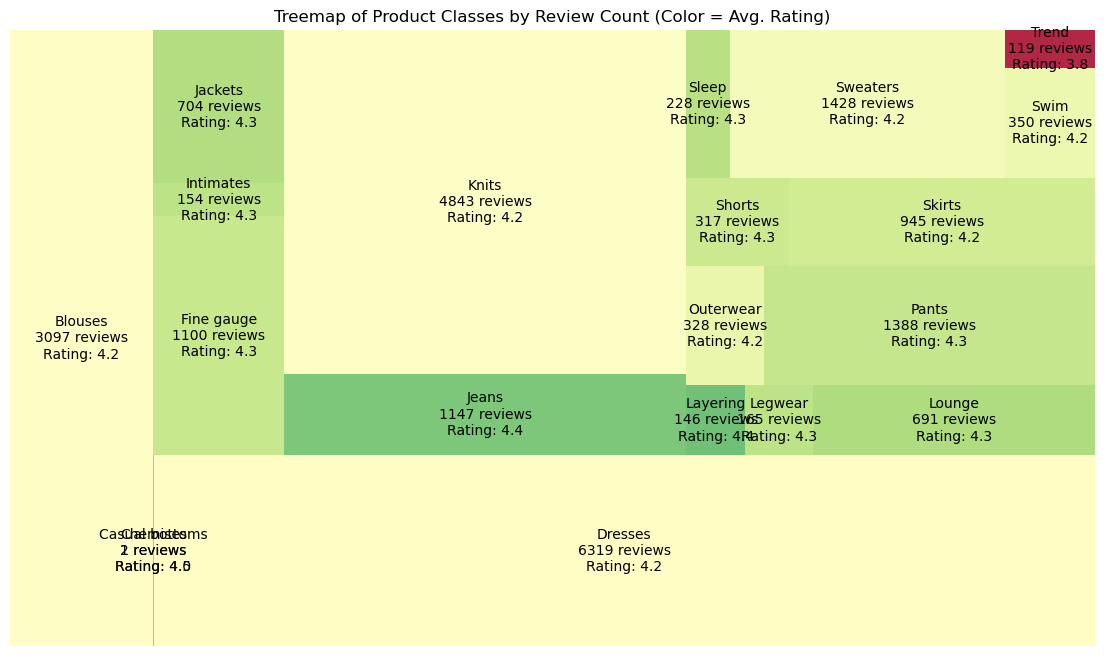

In [21]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Group data by Class Name
treemap_df = df.groupby('Class Name').agg({
    'Review Text': 'count',
    'Rating': 'mean'
}).reset_index().rename(columns={'Review Text': 'Review_Count', 'Rating': 'Avg_Rating'})

# Normalize average rating for color mapping
norm = plt.Normalize(treemap_df['Avg_Rating'].min(), treemap_df['Avg_Rating'].max())

# Create color gradient: red (low rating) to green (high rating)
colors = [mcolors.to_hex(plt.cm.RdYlGn(norm(x))) for x in treemap_df['Avg_Rating']]

# Labels with class name and average rating
labels = [f"{name}\n{count} reviews\nRating: {rating:.1f}"
          for name, count, rating in zip(treemap_df['Class Name'], treemap_df['Review_Count'], treemap_df['Avg_Rating'])]

# Plot Treemap
plt.figure(figsize=(14, 8))
squarify.plot(sizes=treemap_df['Review_Count'], label=labels, color=colors, alpha=0.85)
plt.axis('off')
plt.title("Treemap of Product Classes by Review Count (Color = Avg. Rating)")
plt.show()


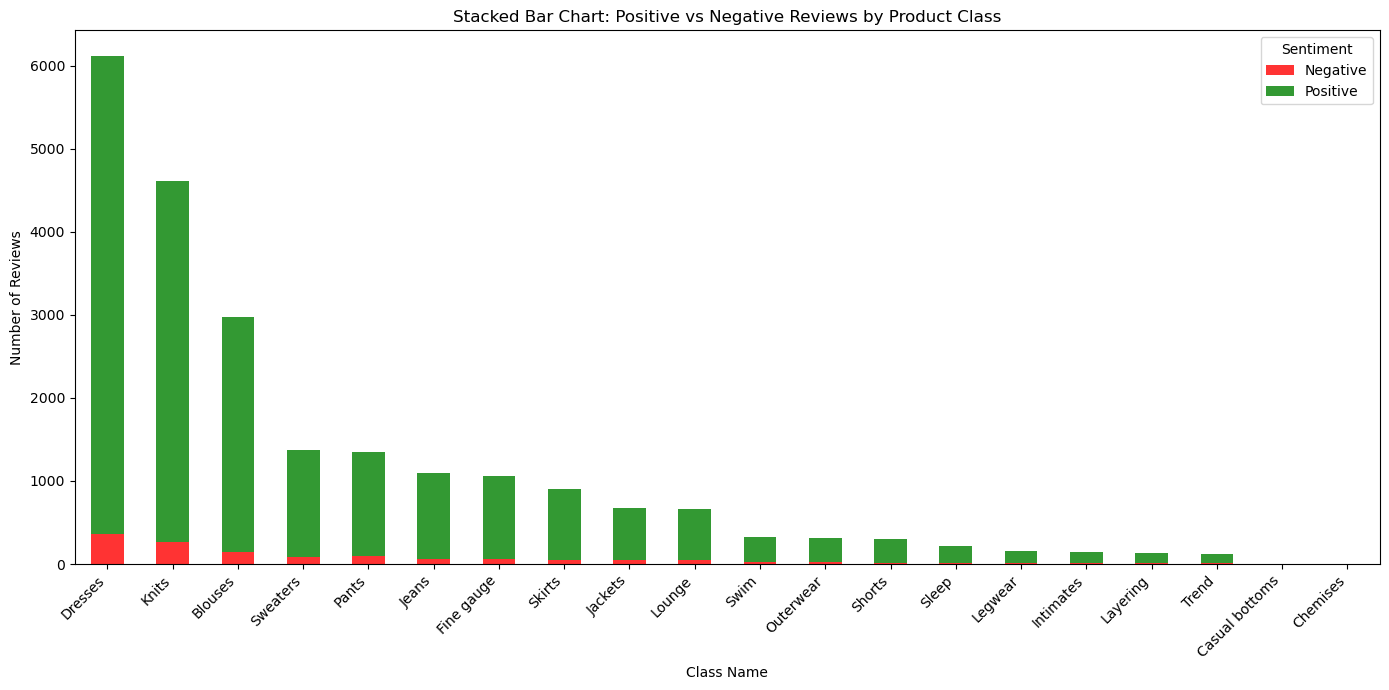

In [22]:
import seaborn as sns

# Count of reviews by class and sentiment
sentiment_counts = df[df['Sentiment'].isin(['Positive', 'Negative'])] \
    .groupby(['Class Name', 'Sentiment']).size().unstack(fill_value=0)

# Plot
sentiment_counts = sentiment_counts.sort_values(by='Positive', ascending=False)

sentiment_counts.plot(kind='bar', stacked=True, figsize=(14, 7),
                      color=['red', 'green'], alpha=0.8)

plt.title("Stacked Bar Chart: Positive vs Negative Reviews by Product Class")
plt.xlabel("Class Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Sentiment")
plt.show()


## Top Complaint Themes (N-gram Analysis)

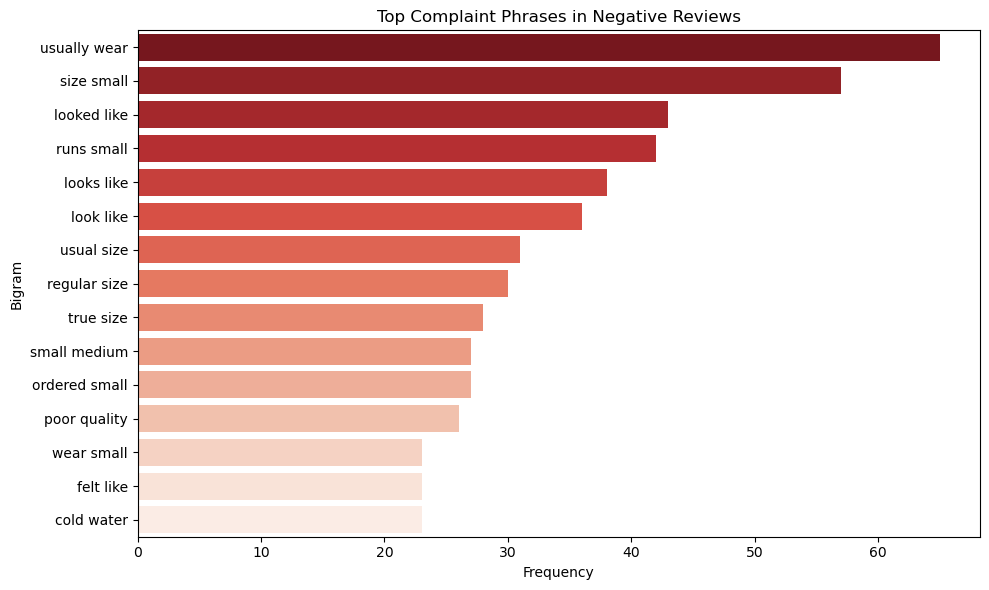

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract bi-grams from negative reviews
negative_reviews = df[df['Sentiment'] == 'Negative']['Review Text'].dropna()

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(negative_reviews)

# Top 15 most common bi-grams
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_ngrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:15]

# Plot
ngram_df = pd.DataFrame(top_ngrams, columns=['Bigram', 'Frequency'])
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Bigram', data=ngram_df, palette='Reds_r')
plt.title("Top Complaint Phrases in Negative Reviews")
plt.tight_layout()
plt.show()


## Web Engagement Distribution by Age Group

C:\Users\DELL\AppData\Local\Temp\ipykernel_6196\3336505266.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_age = df.groupby(['Age Group', 'Sentiment']).size().unstack().fillna(0)


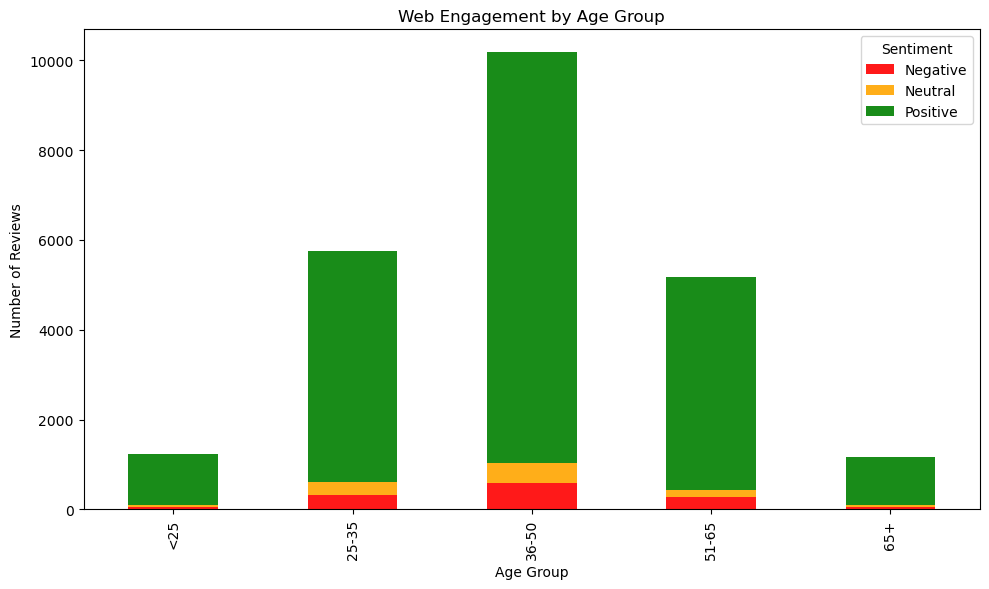

In [24]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 65, 100],
                         labels=['<25', '25-35', '36-50', '51-65', '65+'])

sentiment_by_age = df.groupby(['Age Group', 'Sentiment']).size().unstack().fillna(0)

sentiment_by_age.plot(kind='bar', stacked=True, figsize=(10,6),
                      color=['red', 'orange', 'green'], alpha=0.9)
plt.title("Web Engagement by Age Group")
plt.ylabel("Number of Reviews")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()


## Do longer reviews tend to be more negative?

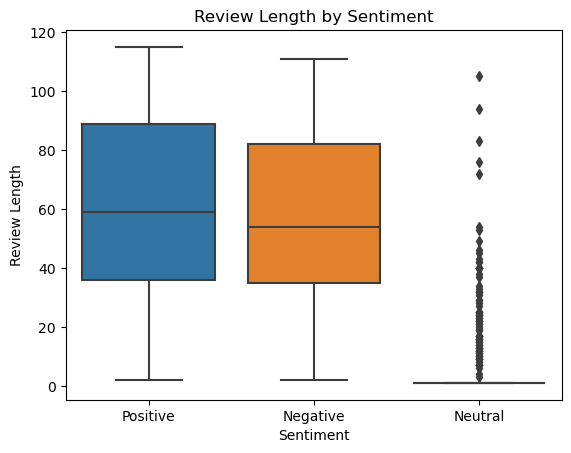

In [25]:
df['Review Length'] = df['Review Text'].apply(lambda x: len(str(x).split()))

sns.boxplot(x='Sentiment', y='Review Length', data=df[df['Sentiment'].notnull()])
plt.title("Review Length by Sentiment")
plt.show()

## Department-wise Positive Review Ratio Heatmap

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


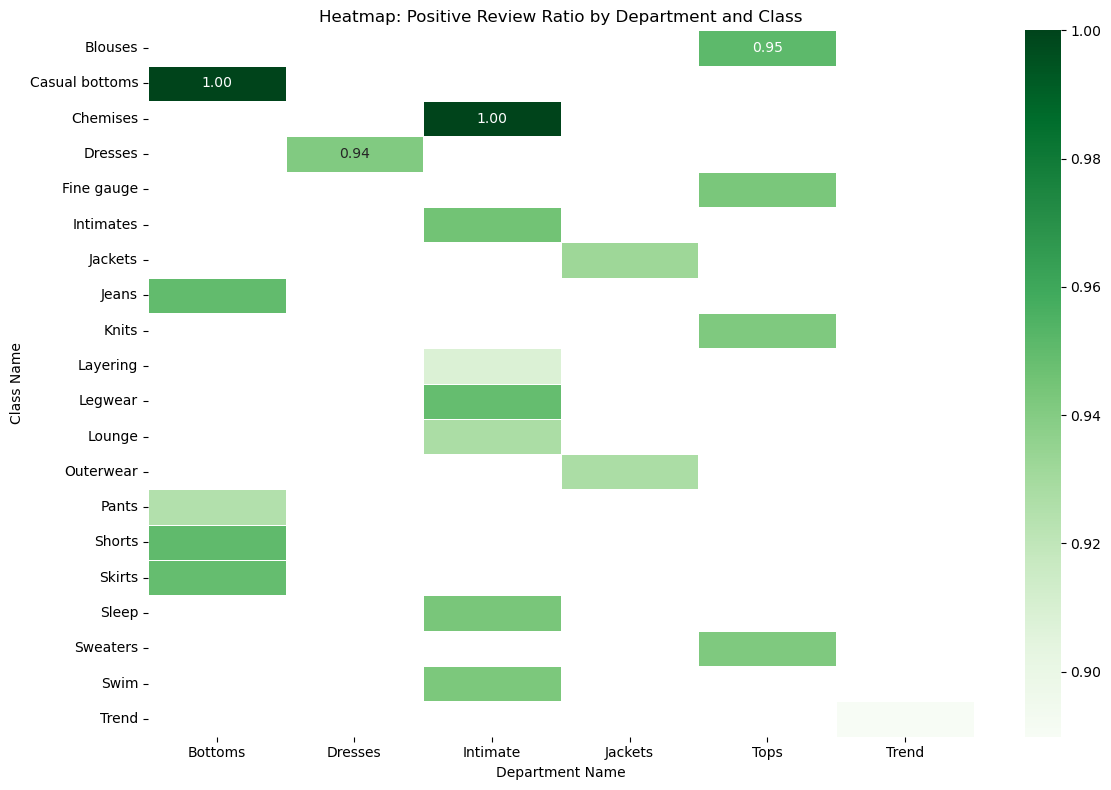

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and calculate positive ratio
sentiment_pivot = df[df['Sentiment'].isin(['Positive', 'Negative'])] \
    .groupby(['Department Name', 'Class Name', 'Sentiment']) \
    .size().unstack(fill_value=0)

sentiment_pivot['Total'] = sentiment_pivot.sum(axis=1)
sentiment_pivot['Positive Ratio'] = sentiment_pivot['Positive'] / sentiment_pivot['Total']

# Pivot for heatmap
heatmap_data = sentiment_pivot.reset_index().pivot(index="Class Name", columns="Department Name", values="Positive Ratio")

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Greens', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Positive Review Ratio by Department and Class")
plt.tight_layout()
plt.show()


## Class-wise Return/Complaint Rate (Assuming Negative Reviews as Proxies)

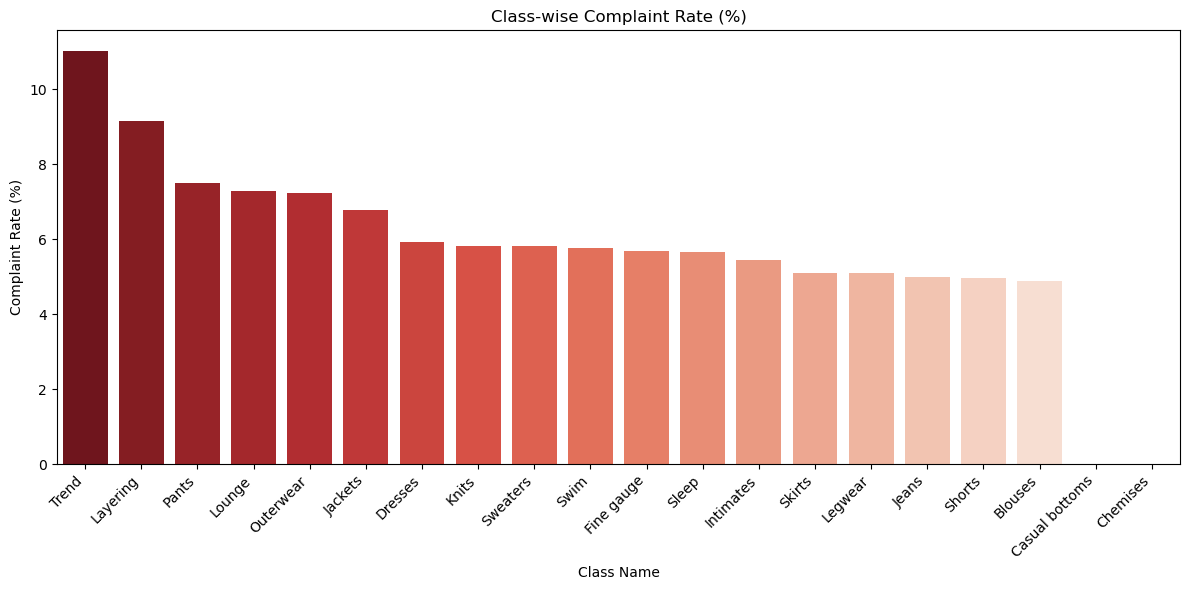

In [27]:
# Group by Class and Sentiment
class_sentiment = df[df['Sentiment'].isin(['Positive', 'Negative'])] \
    .groupby(['Class Name', 'Sentiment']).size().unstack(fill_value=0)

# Calculate complaint rate
class_sentiment['Total'] = class_sentiment.sum(axis=1)
class_sentiment['Complaint Rate (%)'] = (class_sentiment['Negative'] / class_sentiment['Total']) * 100

# Sort and plot
class_sentiment_sorted = class_sentiment.sort_values(by='Complaint Rate (%)', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=class_sentiment_sorted.index, y=class_sentiment_sorted['Complaint Rate (%)'], palette='Reds_r')
plt.xticks(rotation=45, ha='right')
plt.title("Class-wise Complaint Rate (%)")
plt.ylabel("Complaint Rate (%)")
plt.xlabel("Class Name")
plt.tight_layout()
plt.show()


## Time-based Review Trends

In [28]:
import numpy as np
from datetime import timedelta, datetime

# Simulate review dates (for demo purposes)
np.random.seed(0)
df['Review Date'] = pd.to_datetime('2021-01-01') + pd.to_timedelta(np.random.randint(0, 365, df.shape[0]), unit='D')


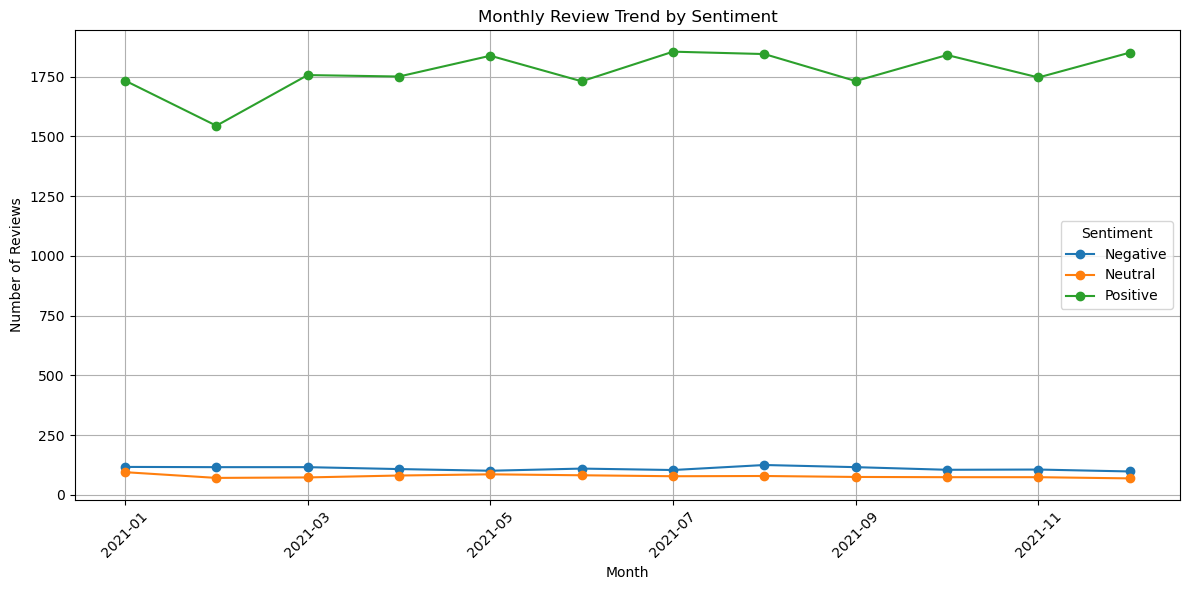

In [29]:
# Monthly review counts by sentiment
df['Month'] = df['Review Date'].dt.to_period('M').astype(str)
monthly_sentiment = df.groupby(['Month', 'Sentiment']).size().unstack(fill_value=0)

# Plot
monthly_sentiment.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Review Trend by Sentiment")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Age Group vs Product Category (Based on Number of Reviews)

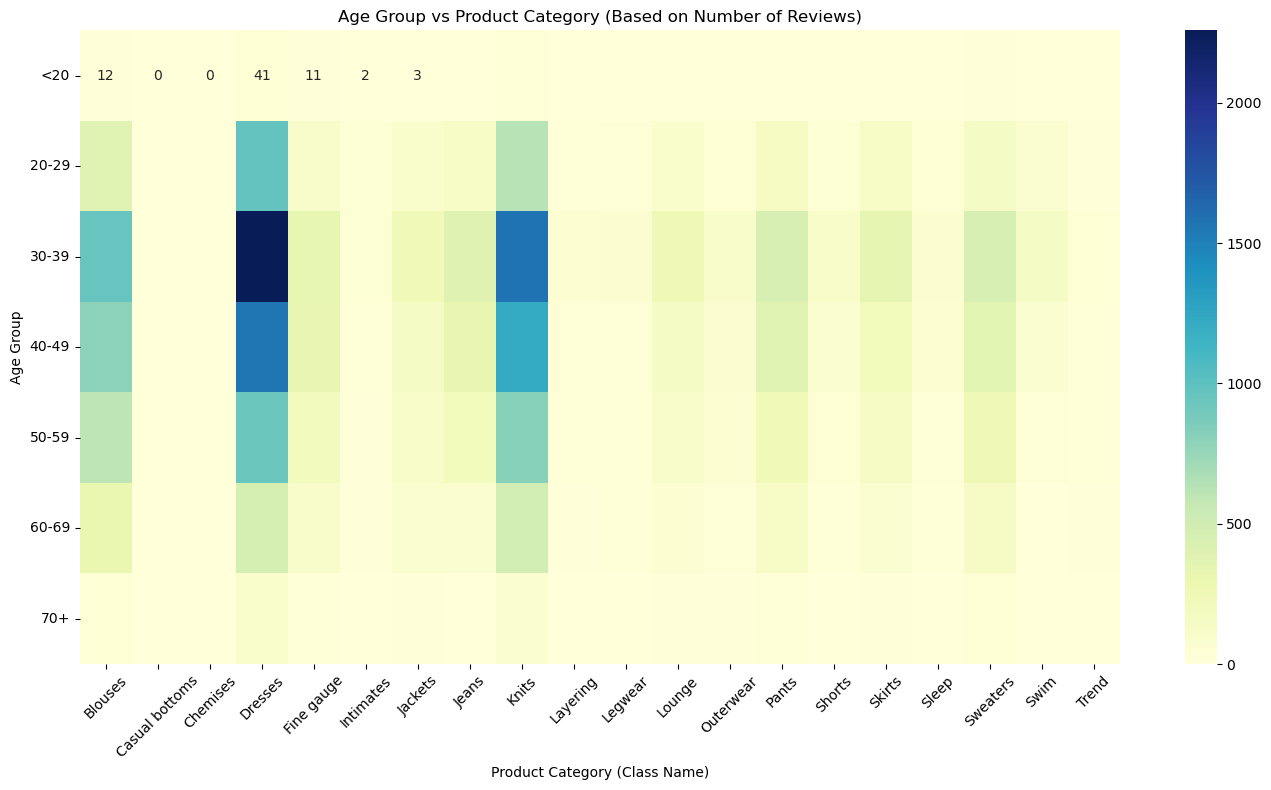

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Bin ages into groups ---
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# --- Step 2: Pivot Table ---
pivot_age_category = df.pivot_table(index='Age Group', 
                                    columns='Class Name', 
                                    values='Review Text', 
                                    aggfunc='count').fillna(0)

# --- Step 3: Plot Heatmap ---
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_age_category, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Age Group vs Product Category (Based on Number of Reviews)")
plt.xlabel("Product Category (Class Name)")
plt.ylabel("Age Group")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## A bar plot showing top 3 categories per age group

C:\Users\DELL\AppData\Local\Temp\ipykernel_6196\3906707825.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Age Group'] = pd.cut(positive_df['Age'], bins=age_bins, labels=age_labels)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6196\3906707825.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_counts = positive_df.groupby(['Age Group', 'Class Name']).size().reset_index(name='Review Count')
C:\Users\DELL\AppData\Local\Temp\ipykernel_6196\3906707825.py:14: FutureWarning: The default of observed=False is deprecated and will be changed 

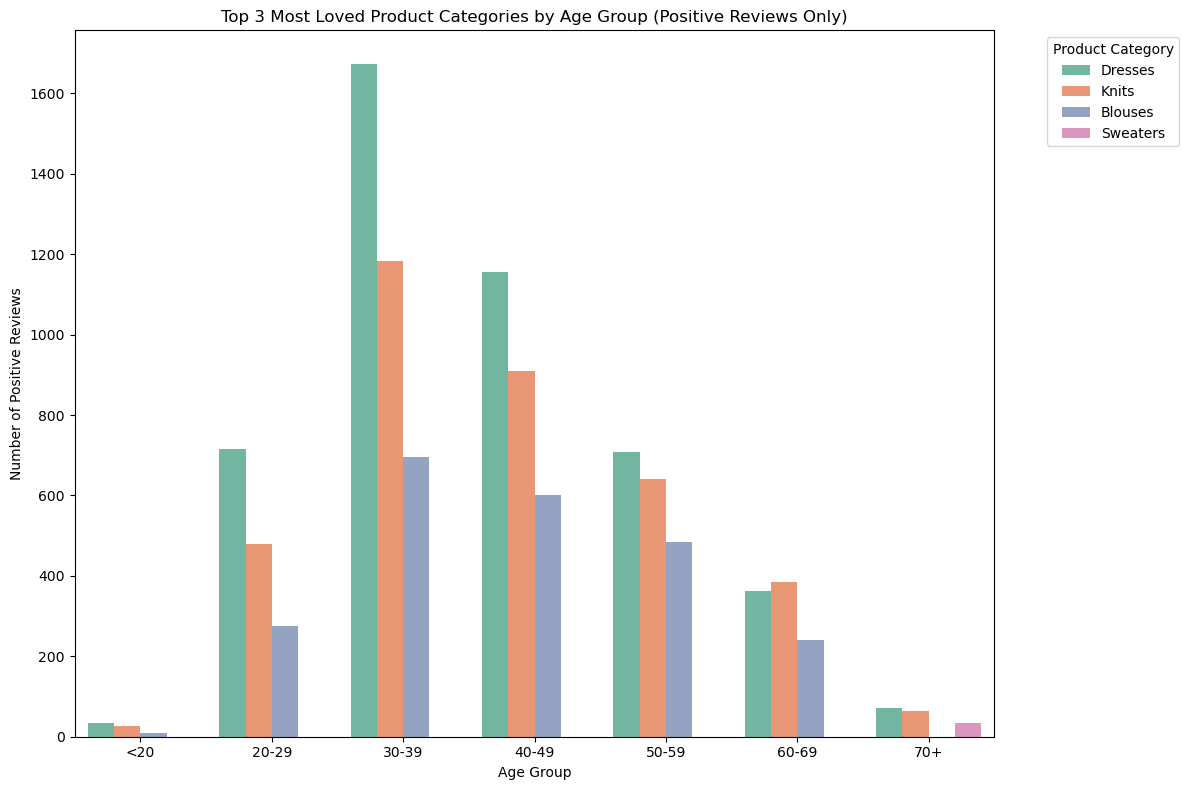

In [31]:
# STEP 1: Filter only positive reviews
positive_df = df[(df['Rating'] >= 4) & (df['Recommended IND'] == 1)]

# STEP 2: Create Age Group Bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
positive_df['Age Group'] = pd.cut(positive_df['Age'], bins=age_bins, labels=age_labels)

# STEP 3: Count reviews per (Age Group, Class Name)
age_class_counts = positive_df.groupby(['Age Group', 'Class Name']).size().reset_index(name='Review Count')

# STEP 4: Get top 3 categories per age group
top3_per_group = age_class_counts.sort_values(['Age Group', 'Review Count'], ascending=[True, False])
top3_per_group = top3_per_group.groupby('Age Group').head(3)

# STEP 5: Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top3_per_group, x='Age Group', y='Review Count', hue='Class Name', palette='Set2')
plt.title("Top 3 Most Loved Product Categories by Age Group (Positive Reviews Only)")
plt.ylabel("Number of Positive Reviews")
plt.xlabel("Age Group")
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## What Positive Reviewers Love Most

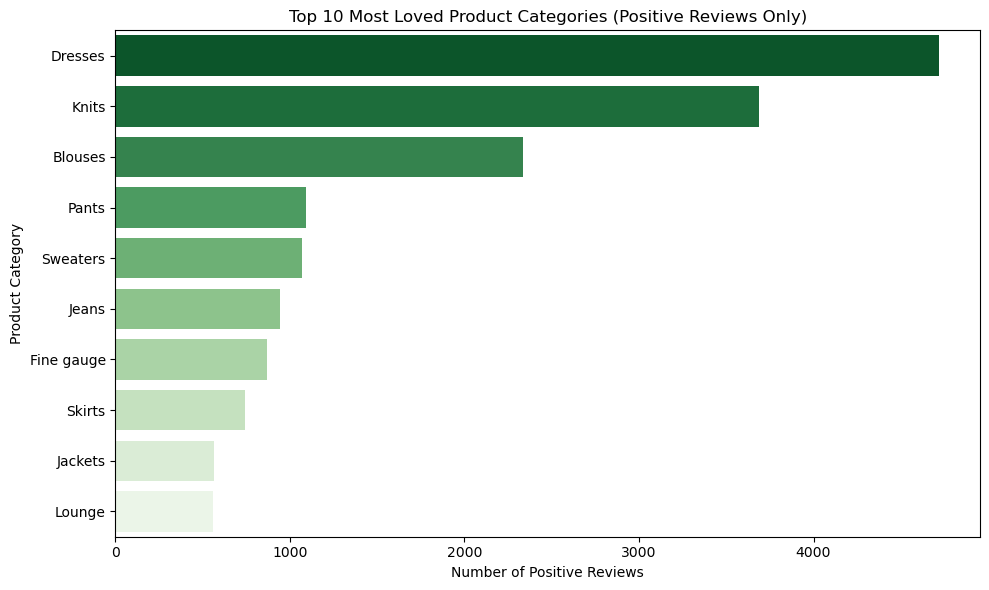

In [32]:
#STEP 1: Filter only positive reviews
positive_reviews = df[(df['Rating'] >= 4) & (df['Recommended IND'] == 1)]

# STEP 2: Count top loved categories
top_classes = positive_reviews['Class Name'].value_counts().head(10)

# STEP 3: Plot the most loved product categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_classes.values, y=top_classes.index, palette='Greens_r')
plt.title("Top 10 Most Loved Product Categories (Positive Reviews Only)")
plt.xlabel("Number of Positive Reviews")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

## What departments/divisions are most loved

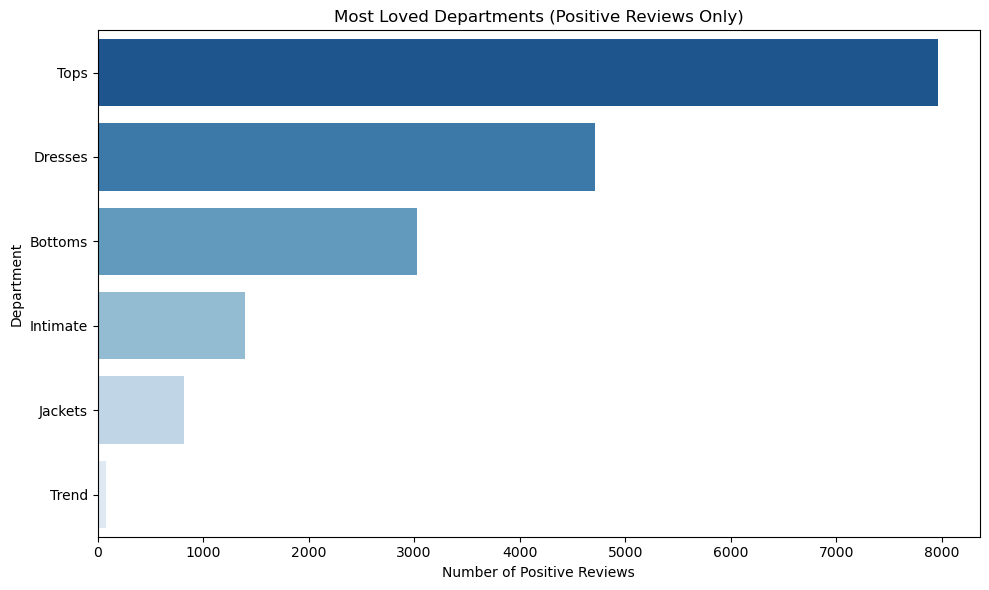

In [33]:
# By Department
top_departments = positive_reviews['Department Name'].value_counts().head(10)

# Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x=top_departments.values, y=top_departments.index, palette='Blues_r')
plt.title("Most Loved Departments (Positive Reviews Only)")
plt.xlabel("Number of Positive Reviews")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


## Trend Analysis: Average Rating by Age Group

C:\Users\DELL\AppData\Local\Temp\ipykernel_6196\1638633428.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rating = df.groupby('Age Group')['Rating'].mean().reset_index()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


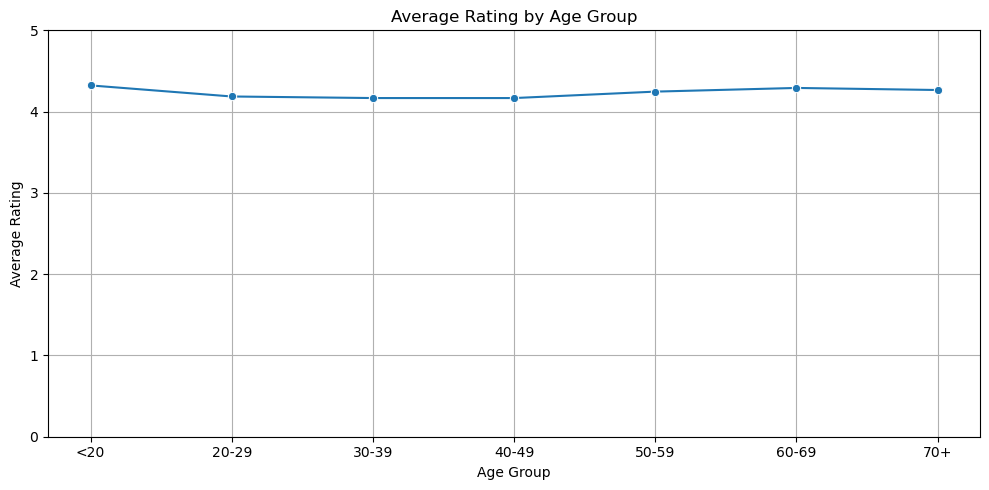

In [34]:
# Group by Age Group and get average rating
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_rating = df.groupby('Age Group')['Rating'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=age_rating, x='Age Group', y='Rating', marker='o')
plt.title("Average Rating by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.show()


## Purchase Preferences by Division

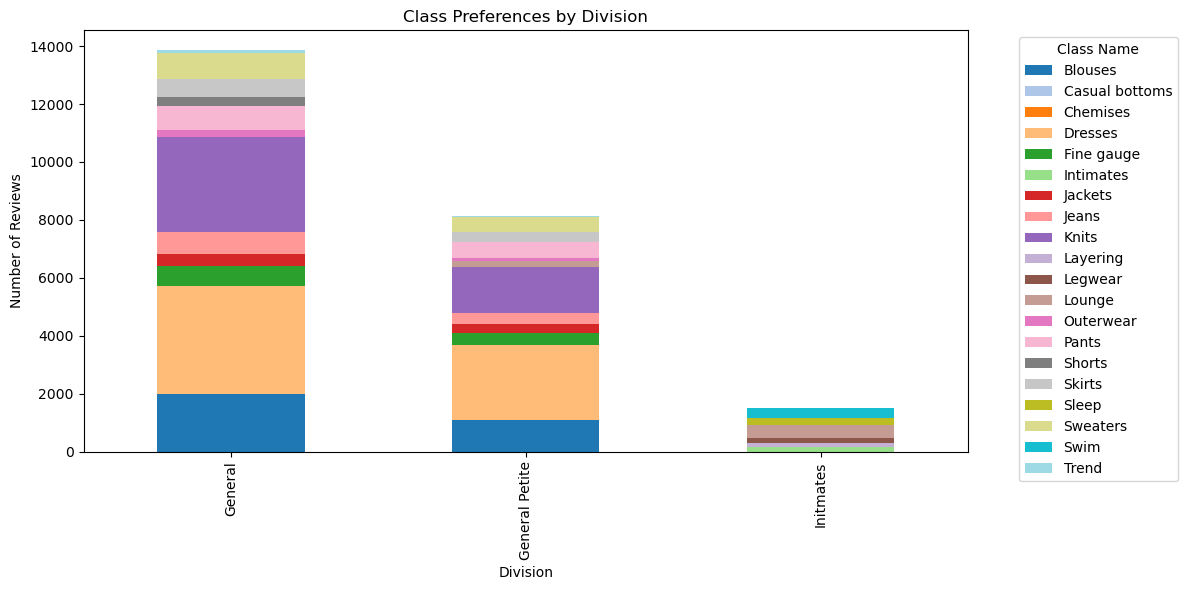

In [35]:
# Count by Division & Class
div_class_ct = df.groupby(['Division Name', 'Class Name']).size().unstack(fill_value=0)

# Plot
div_class_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Class Preferences by Division")
plt.xlabel("Division")
plt.ylabel("Number of Reviews")
plt.legend(title='Class Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Rating Distribution by Product Class

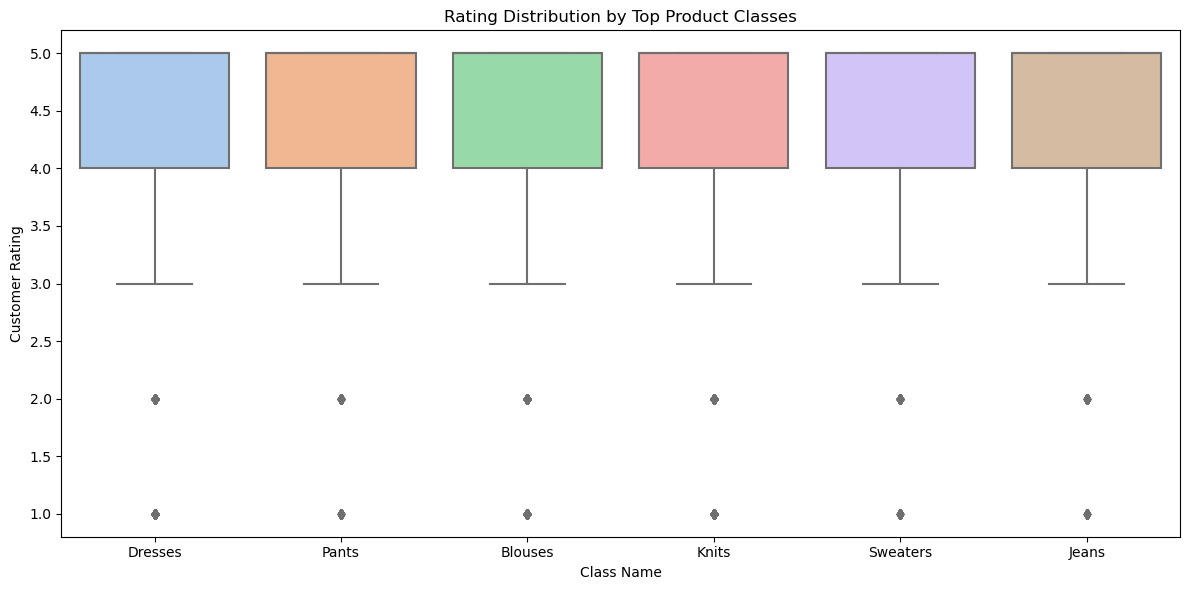

In [36]:
top_classes = df['Class Name'].value_counts().nlargest(6).index
subset = df[df['Class Name'].isin(top_classes)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='Class Name', y='Rating', palette='pastel')
plt.title("Rating Distribution by Top Product Classes")
plt.xlabel("Class Name")
plt.ylabel("Customer Rating")
plt.tight_layout()
plt.show()


## Review Volume Over Time

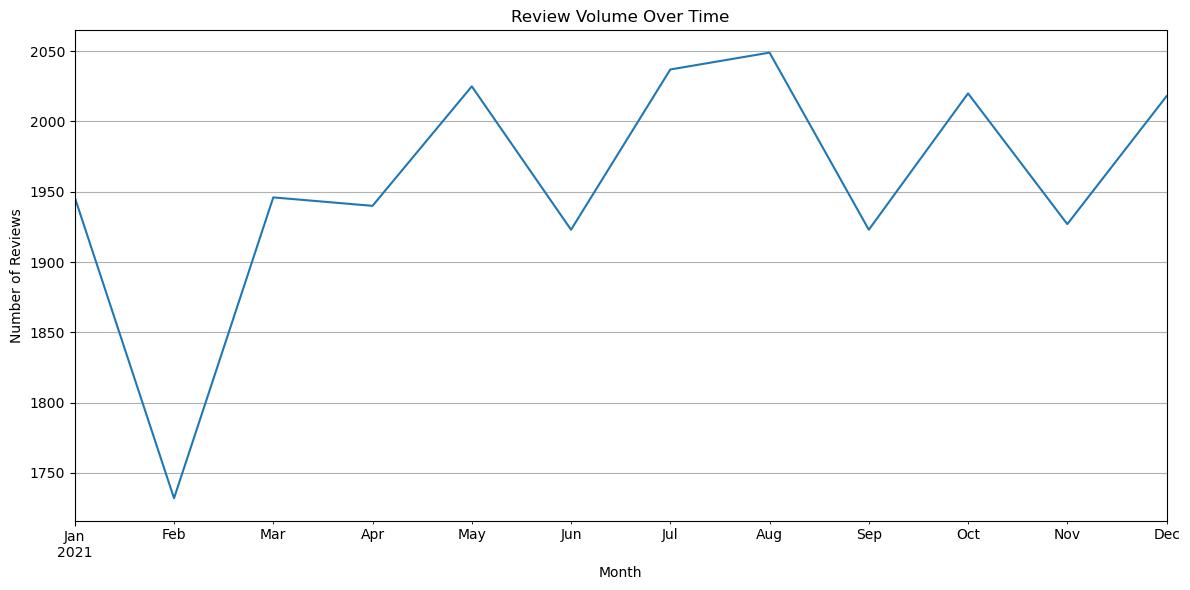

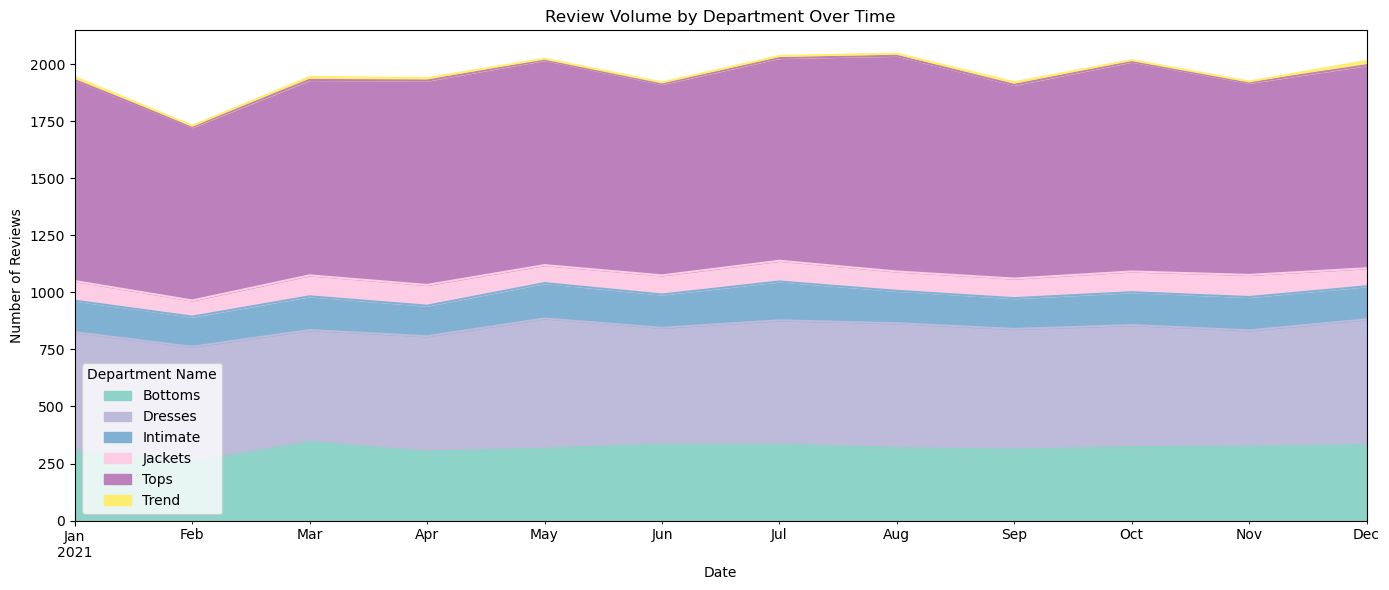

In [37]:
# STEP 1: Convert to datetime if not already
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')

# STEP 2: Drop missing dates (if any)
df = df.dropna(subset=['Review Date'])

# STEP 3: Aggregate review counts by month
review_trend = df.set_index('Review Date').resample('M').size()

# STEP 4: Plot
plt.figure(figsize=(12, 6))
review_trend.plot()
plt.title("Review Volume Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()

df['Month'] = df['Review Date'].dt.to_period('M')
monthly_dept = df.groupby(['Month', 'Department Name']).size().unstack().fillna(0)
monthly_dept.index = monthly_dept.index.to_timestamp()

monthly_dept.plot.area(figsize=(14, 6), colormap='Set3')
plt.title("Review Volume by Department Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

## Correlation Heatmap (Age, Rating, Feedback Count)

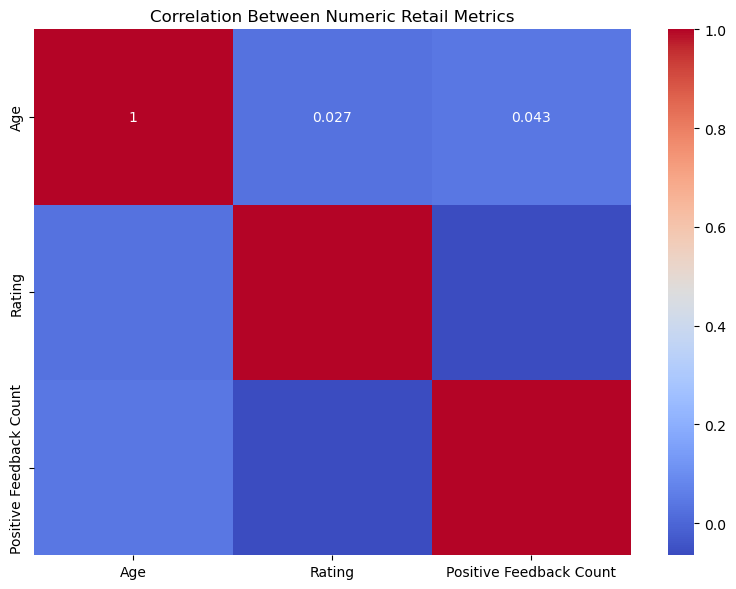

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Rating', 'Positive Feedback Count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Retail Metrics")
plt.tight_layout()
plt.show()


# Conclusion
The web content analytics performed on the online fashion review dataset provided valuable insights into consumer engagement, satisfaction patterns, and category-level performance.

By analyzing sentiment trends, keyword patterns, and division-wise content volumes, the study demonstrates how web review data can act as a proxy for digital consumer intelligence.

These findings can help businesses and marketers refine inventory strategies, targeted ad campaigns, and product development efforts, aligning them with actual consumer behavior reflected on the web.
## Objective 1
"Identify high-performing product categories and their target web audiences through sentiment and engagement analytics"
## Findings:
Product categories such as Dresses, Tops, and Blouses showed high positive engagement across web reviews.

These categories were concentrated under the General division and Dresses department.

Users aged 30–39 formed the most active group, contributing the highest share of positive interactions.

The recommendation indicator (Recommended IND = 1) frequently appeared in these groups, confirming a strong correlation between web sentiment, product category, and user demographics.
### Web insight
High-performing web content and engagement occur in fashion categories that resonate with younger demographics, highlighting areas for targeted web marketing.

## Objective 2
"Analyze negative online content to identify recurring dissatisfaction patterns and product-related issues."
## Findings:
Word cloud and frequency analysis revealed key dissatisfaction terms: fit, material, small, tight, design, not comfortable.

These patterns were concentrated in Bottoms, Knits, and occasionally Dresses.

Treemaps showed clear sentiment clustering — with negative zones concentrated in specific product classes.
### Web insight 
Negative web content reflects dissatisfaction in fit and material, providing clear direction for product improvement and customer experience management.

## Objective 3
"Evaluate how sentiment and content volume vary across divisions to optimize web marketing and inventory focus"
## Findings:
General Division and Dresses Department dominated both review volume and positivity, indicating strong online engagement.

Intimate Division displayed fewer reviews with more neutral to negative sentiment — a sign of low web traction or niche audience appeal.

Heatmaps of class-department combinations showed highly uneven web interaction intensity, indicating that only select divisions attract user attention.
### Web insight
Web content distribution and sentiment patterns can guide marketing prioritization and inventory allocation for categories with strong online resonance.